# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df=pd.read_excel('Datasets/data.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_hecho         715 non-null    object        
 1   cant_victimas    715 non-null    int64         
 2   fecha            715 non-null    datetime64[ns]
 3   hora             714 non-null    datetime64[ns]
 4   lugar_del_hecho  715 non-null    object        
 5   tipo_de_calle    715 non-null    object        
 6   calle            715 non-null    object        
 7   altura           133 non-null    float64       
 8   cruce            540 non-null    object        
 9   dirección        707 non-null    object        
 10  comuna           715 non-null    int64         
 11  latitud          704 non-null    float64       
 12  longitud         704 non-null    float64       
 13  involucrados     715 non-null    object        
 14  victima          715 non-null    object   

In [4]:
def grafico_frecuencias(data,variable : str,ejex : str):
    ax=sns.countplot(data=data,x=variable,hue=variable,palette='bright')
    ax.set_title('Conteo de frecuencia de la variable ' + variable)
    ax.set_xlabel(ejex)
    ax.set_ylabel('Frecuencia')
    return

## Conteo de frecuencias

En primer lugar se examinan las variables cuanlitativas y las cuantitativas discretas con los gráficos de conteos de frecuencias.

Text(0, 0.5, 'Frecuencia')

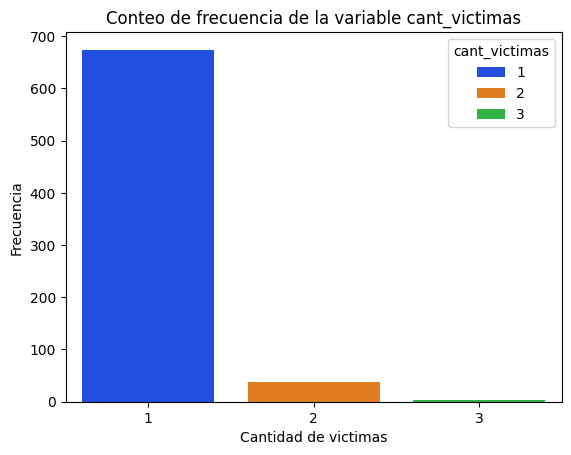

In [5]:
ax=sns.countplot(data=df, x='cant_victimas', hue='cant_victimas', palette='bright')
ax.set_title('Conteo de frecuencia de la variable cant_victimas')
ax.set_xlabel('Cantidad de victimas')
ax.set_ylabel('Frecuencia')

Como se puede ver en la gráfica anterior en la mayoría de siniestros la cantidad de víctimas es 1 sola persona

Con el tipo de variable *datetime* se puede analizar mas fácilmente las fechas y los periodos típicos.

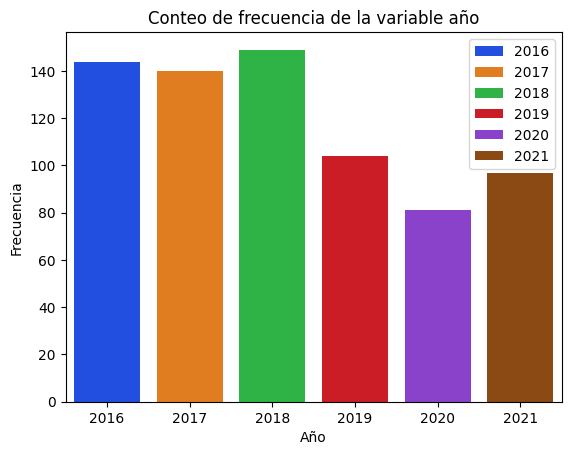

In [6]:
ax=sns.countplot(data=df, x=df['fecha'].dt.year, hue=df['fecha'].dt.year, palette='bright')
ax.set_title('Conteo de frecuencia de la variable año')
ax.set_xlabel('Año')
ax.set_ylabel('Frecuencia')
ax.legend(loc='best')

Se puede ver una tendencia en la disminución de las víctimas por siniestros desde el 2016 al 2021

In [7]:
#Creo la columna semestre
df['semestre'] = (df['fecha'].dt.month - 1) // 6 + 1

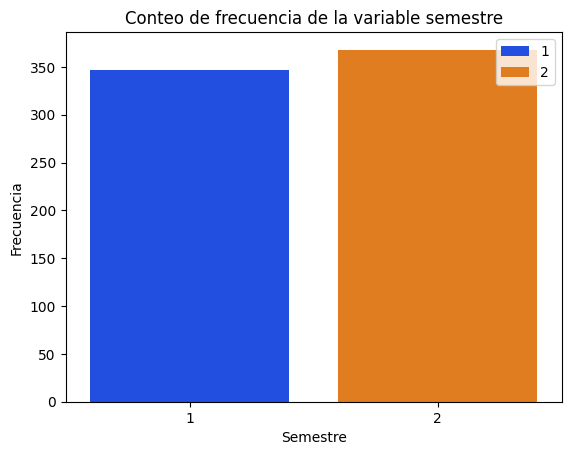

In [8]:
ax=sns.countplot(data=df, x='semestre', hue='semestre', palette='bright')
ax.set_title('Conteo de frecuencia de la variable semestre')
ax.set_xlabel('Semestre')
ax.set_ylabel('Frecuencia')
ax.legend(loc='best')

In [9]:
#Creo la columna trimestre
df['trimestre']=df['fecha'].dt.quarter

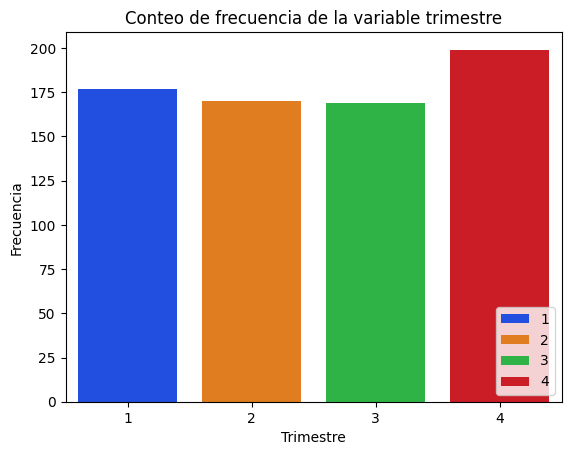

In [10]:
ax=sns.countplot(data=df, x='trimestre', hue='trimestre', palette='bright')
ax.set_title('Conteo de frecuencia de la variable trimestre')
ax.set_xlabel('Trimestre')
ax.set_ylabel('Frecuencia')
ax.legend(loc='lower right')

En cuanto a los trimestres, el último del año presenta la mayor cantidad de victimas a lo largo de los años de los que se cuentan con datos.

In [11]:
df['bimestre'] = ((df['fecha'].dt.month - 1) // 2) + 1

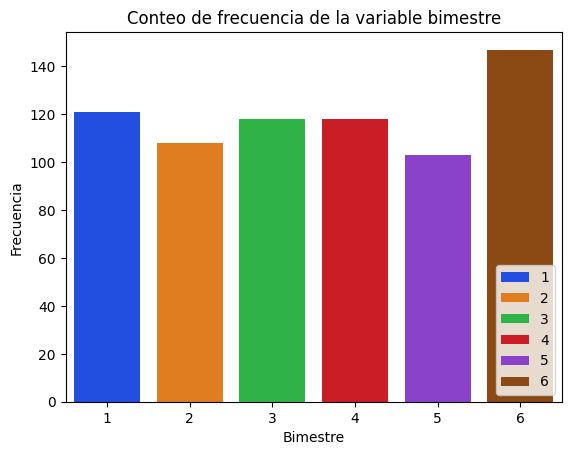

In [12]:
ax=sns.countplot(data=df, x='bimestre', hue='bimestre', palette='bright')
ax.set_title('Conteo de frecuencia de la variable bimestre')
ax.set_xlabel('Bimestre')
ax.set_ylabel('Frecuencia')
ax.legend(loc='lower right')

Incluso podríamos decir que la mayor cantidad de víctimas se dan el último bimestre

Text(0, 0.5, 'Frecuencia')

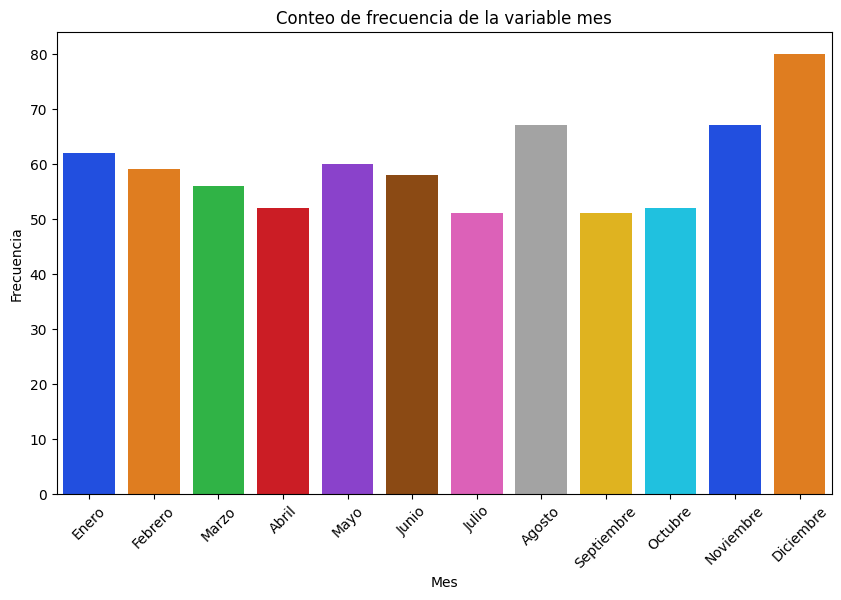

In [13]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(data=df,x=df['fecha'].dt.month_name(locale='es'),hue=df['fecha'].dt.month_name('es'),palette='bright')
plt.xticks(fontsize=10, rotation=45)
ax.set_title('Conteo de frecuencia de la variable mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

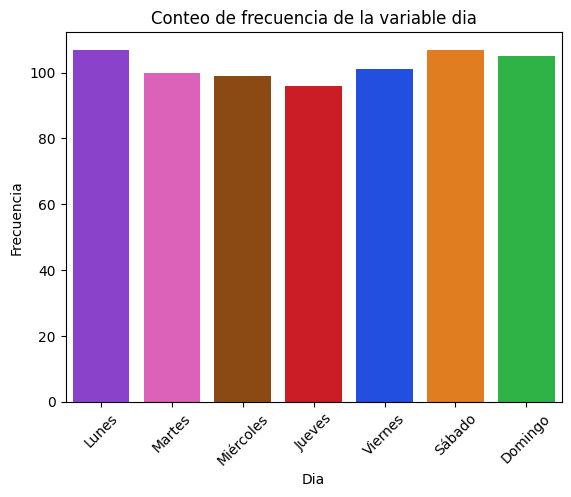

In [14]:
ax=sns.countplot(data=df,x=df['fecha'].dt.day_name(locale='es'),hue=df['fecha'].dt.day_name(locale='es'),palette='bright',order=['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo'])
plt.xticks(fontsize=10, rotation=45)
ax.set_title('Conteo de frecuencia de la variable dia')
ax.set_xlabel('Dia')
ax.set_ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

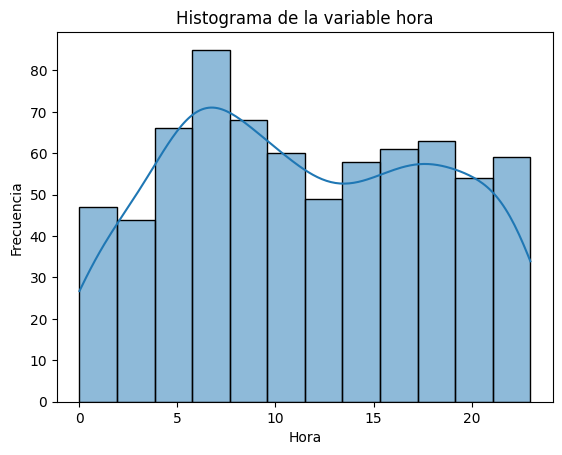

In [21]:
ax=sns.histplot(data=df,x=df['hora'].dt.hour, bins=12,kde=True)
ax.set_title('Histograma de la variable hora')
ax.set_xlabel('Hora')
ax.set_ylabel('Frecuencia')

La mayor cantidad de víctimas se dan entre las 5:00 y las 10:00 de la mañana y entre las 15:00 y las 20:00

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'MOTO'),
  Text(1, 0, 'AUTO'),
  Text(2, 0, 'PEATON'),
  Text(3, 0, 'SD'),
  Text(4, 0, 'CARGAS'),
  Text(5, 0, 'BICICLETA'),
  Text(6, 0, 'PASAJEROS'),
  Text(7, 0, 'MOVIL'),
  Text(8, 0, 'OBJETO FIJO'),
  Text(9, 0, 'PEATON_MOTO')])

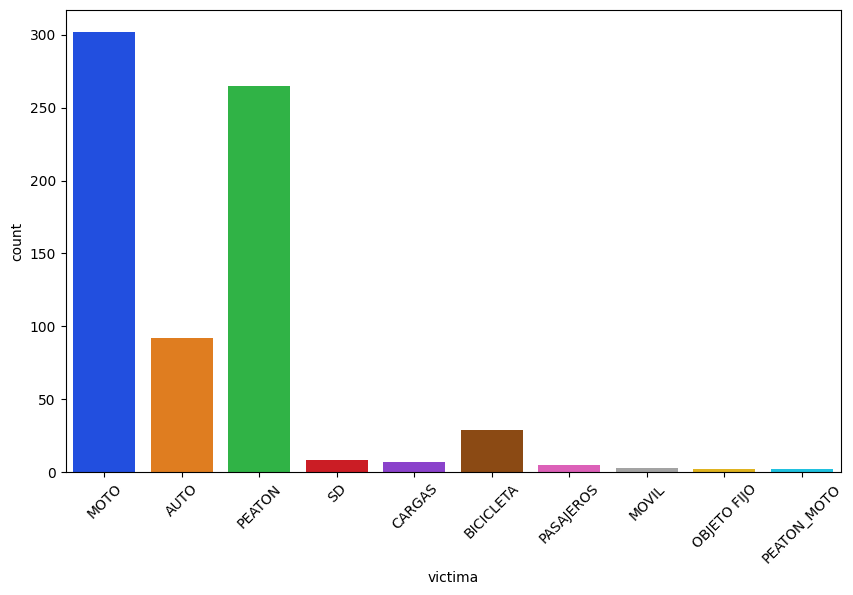

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='victima', hue='victima', palette='bright')
plt.xticks(fontsize=10, rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'AUTO'),
  Text(1, 0, 'PASAJEROS'),
  Text(2, 0, 'SD'),
  Text(3, 0, 'OBJETO FIJO'),
  Text(4, 0, 'CARGAS'),
  Text(5, 0, 'MOTO'),
  Text(6, 0, 'MULTIPLE'),
  Text(7, 0, 'OTRO'),
  Text(8, 0, 'BICICLETA'),
  Text(9, 0, 'TREN')])

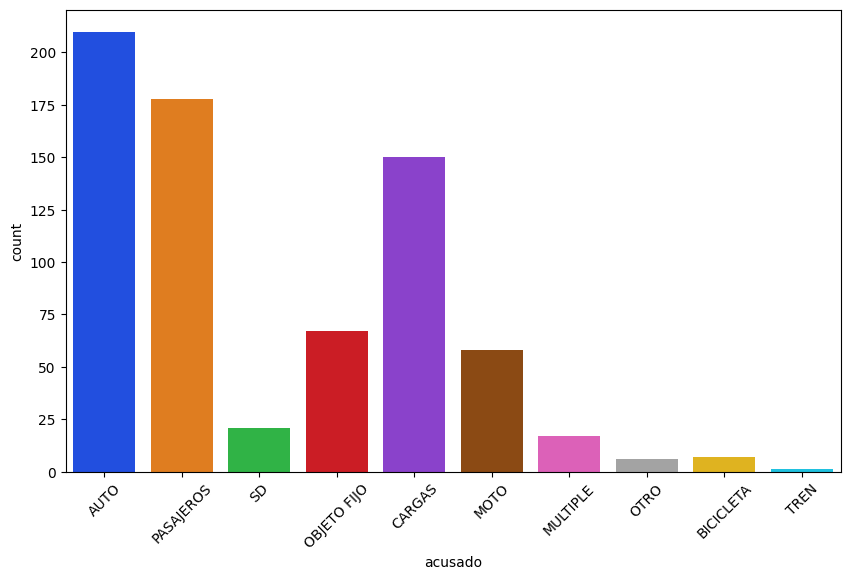

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='acusado', hue='acusado', palette='bright')
plt.xticks(fontsize=10, rotation=45)

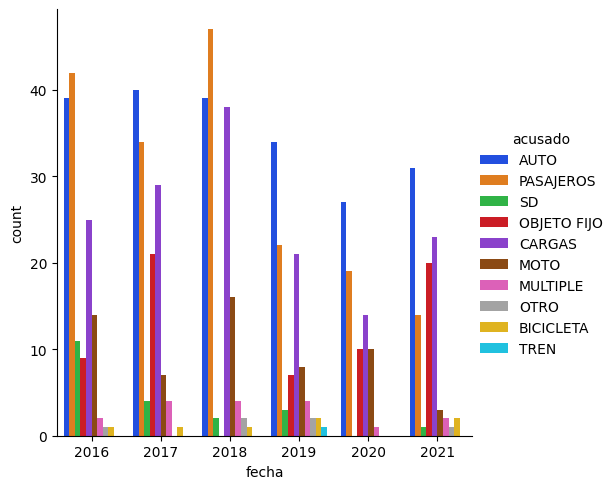

In [27]:
sns.catplot(data=df, x=df['fecha'].dt.year, hue='acusado', kind='count', palette='bright')

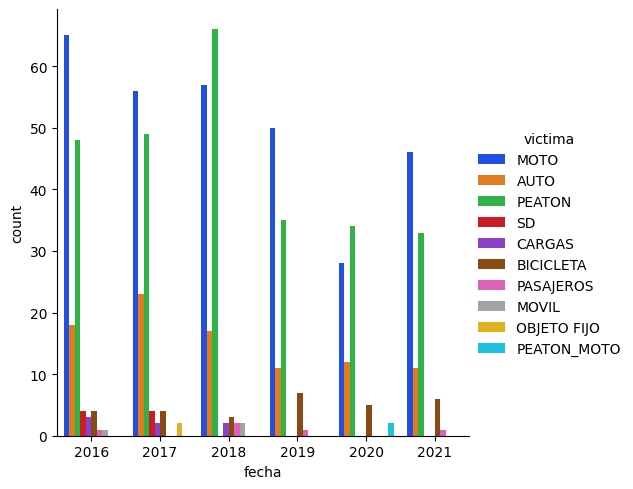

In [26]:
sns.catplot(data=df, x=df['fecha'].dt.year, hue='victima', kind='count', palette='bright')

Text(0, 0.5, 'Frecuencia')

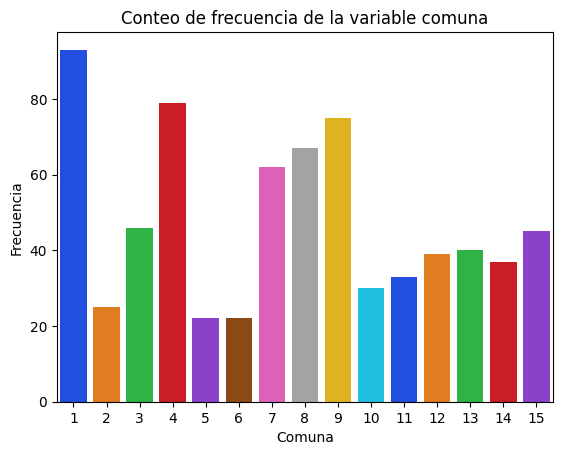

In [33]:
ax=sns.countplot(data=df, x='comuna', hue='comuna', palette='bright',legend=False)
ax.set_title('Conteo de frecuencia de la variable comuna')
ax.set_xlabel('Comuna')
ax.set_ylabel('Frecuencia')


Text(0, 0.5, 'Frecuencia')

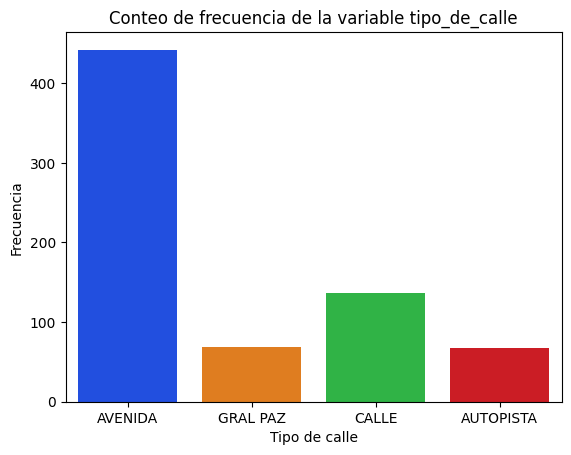

In [36]:
ax=sns.countplot(data=df, x='tipo_de_calle', hue='tipo_de_calle', palette='bright')
ax.set_title('Conteo de frecuencia de la variable tipo_de_calle')
ax.set_xlabel('Tipo de calle')
ax.set_ylabel('Frecuencia')
